In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('coffeeshoprevenue.csv')

In [3]:
df.head()

Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                          152                 6.74                       14   
1                          485                 4.50                       12   
2                          398                 9.09                        6   
3                          320                 8.48                       17   
4                          156                 7.44                       17   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0                    4                   106.62                     97   
1                    8                    57.83                    744   
2                    6                    91.76                    636   
3                    4                   462.63                    770   
4                    2                   412.52                    232   

   Daily_Revenue  
0        1547.81  
1        2084.68  
2        3118.39  
3        2912.20  
4        1663.42

In [4]:
df.tail()

Number_of_Customers_Per_Day  Average_Order_Value  \
1995                          372                 6.41   
1996                          105                 3.01   
1997                           89                 5.28   
1998                          403                 9.41   
1999                           89                 6.88   

      Operating_Hours_Per_Day  Number_of_Employees  Marketing_Spend_Per_Day  \
1995                       11                    4                   466.11   
1996                       11                    7                    12.62   
1997                       16                    9                   376.64   
1998                        7                   12                   452.49   
1999                       13                   14                    78.46   

      Location_Foot_Traffic  Daily_Revenue  
1995                    913        2816.85  
1996                    235         337.97  
1997                    310         951.34  
1998                    577        4266.21  
1999                    322         914.24

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [6]:
df.describe()

Number_of_Customers_Per_Day  Average_Order_Value  \
count                  2000.000000          2000.000000   
mean                    274.296000             6.261215   
std                     129.441933             2.175832   
min                      50.000000             2.500000   
25%                     164.000000             4.410000   
50%                     275.000000             6.300000   
75%                     386.000000             8.120000   
max                     499.000000            10.000000   

       Operating_Hours_Per_Day  Number_of_Employees  Marketing_Spend_Per_Day  \
count              2000.000000          2000.000000              2000.000000   
mean                 11.667000             7.947000               252.614160   
std                   3.438608             3.742218               141.136004   
min                   6.000000             2.000000                10.120000   
25%                   9.000000             5.000000               130.125000   
50%                  12.000000             8.000000               250.995000   
75%                  15.000000            11.000000               375.352500   
max                  17.000000            14.000000               499.740000   

       Location_Foot_Traffic  Daily_Revenue  
count            2000.000000    2000.000000  
mean              534.893500    1917.325940  
std               271.662295     976.202746  
min                50.000000     -58.950000  
25%               302.000000    1140.085000  
50%               540.000000    1770.775000  
75%               767.000000    2530.455000  
max               999.000000    5114.600000

In [7]:
df.columns

Index(['Number_of_Customers_Per_Day', 'Average_Order_Value',
       'Operating_Hours_Per_Day', 'Number_of_Employees',
       'Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue'],
      dtype='object')

In [8]:
df.isnull()

Number_of_Customers_Per_Day  Average_Order_Value  \
0                           False                False   
1                           False                False   
2                           False                False   
3                           False                False   
4                           False                False   
...                           ...                  ...   
1995                        False                False   
1996                        False                False   
1997                        False                False   
1998                        False                False   
1999                        False                False   

      Operating_Hours_Per_Day  Number_of_Employees  Marketing_Spend_Per_Day  \
0                       False                False                    False   
1                       False                False                    False   
2                       False                False                    False   
3                       False                False                    False   
4                       False                False                    False   
...                       ...                  ...                      ...   
1995                    False                False                    False   
1996                    False                False                    False   
1997                    False                False                    False   
1998                    False                False                    False   
1999                    False                False                    False   

      Location_Foot_Traffic  Daily_Revenue  
0                     False          False  
1                     False          False  
2                     False          False  
3                     False          False  
4                     False          False  
...                     ...            ...  
1995                  False          False  
1996                  False          False  
1997                  False          False  
1998                  False          False  
1999                  False          False  

[2000 rows x 7 columns]

In [9]:
df.isnull().sum()

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64

**Uni Variant**

Numeric columns: ['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Operating_Hours_Per_Day', 'Number_of_Employees', 'Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue']
Categorical columns: []


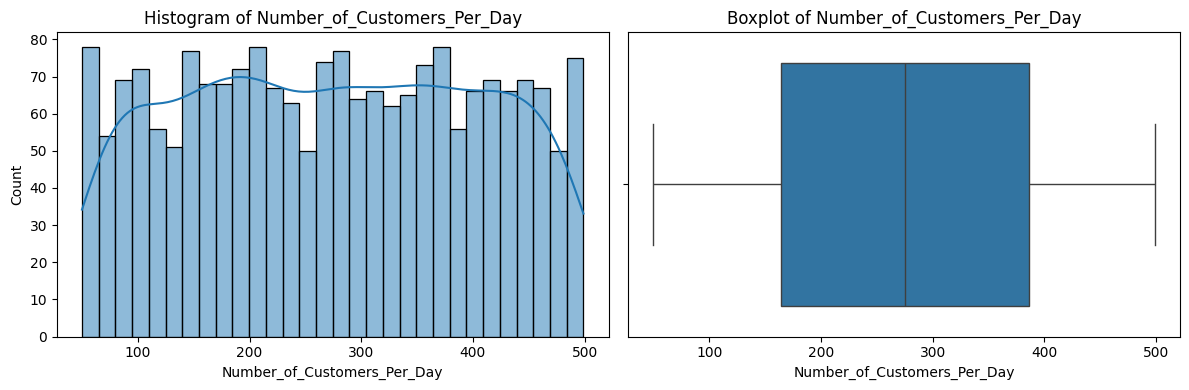

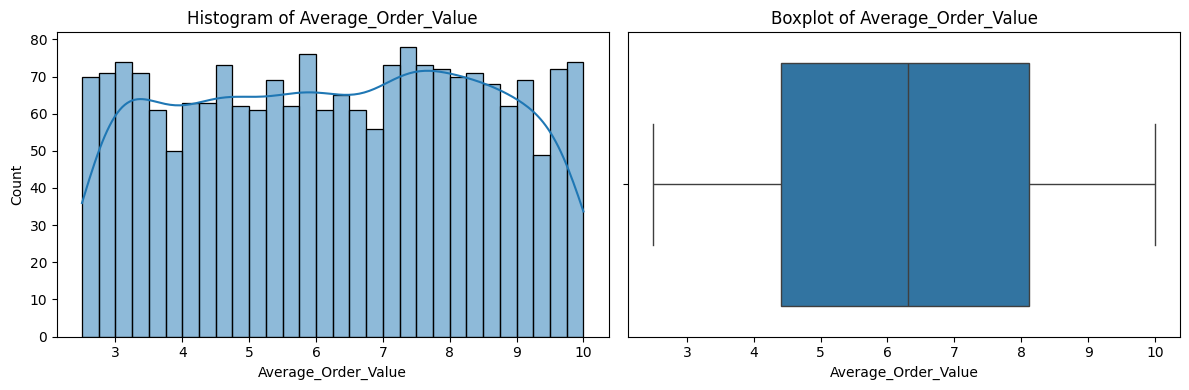

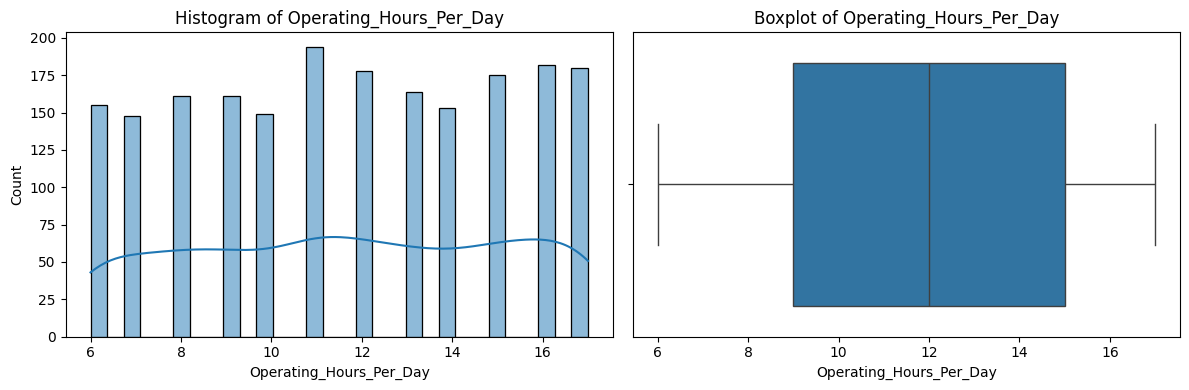

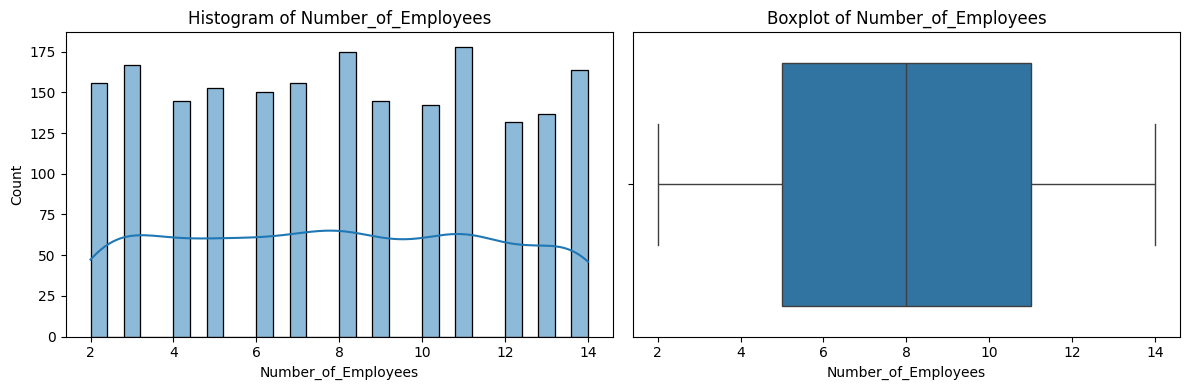

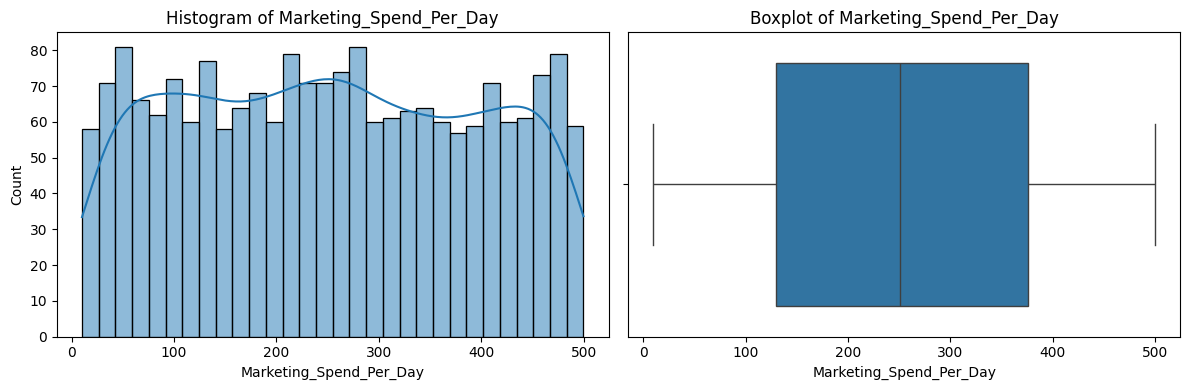

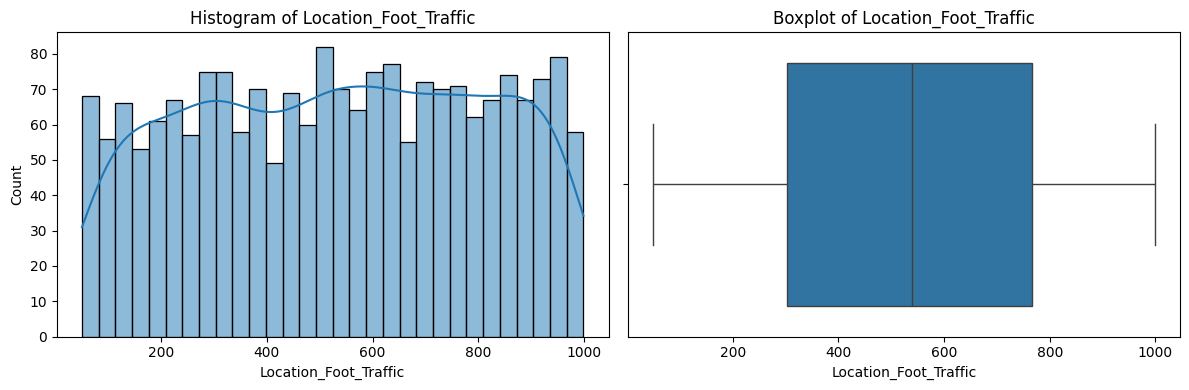

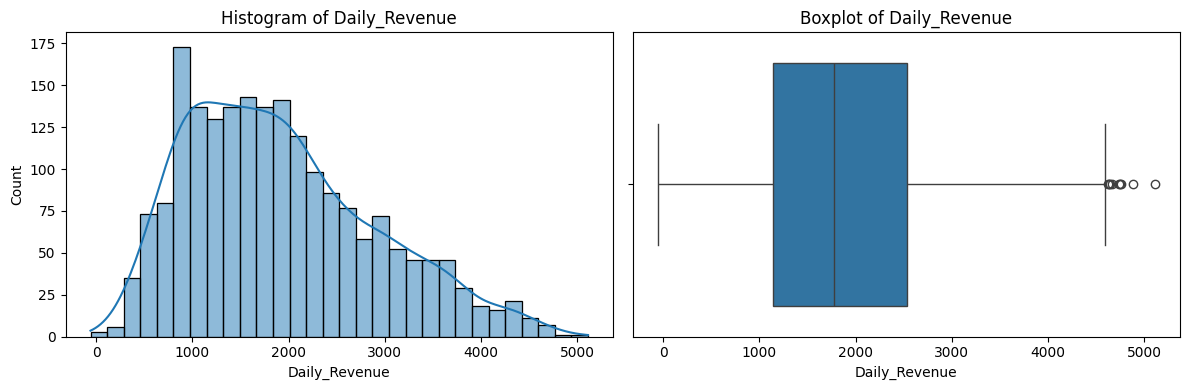

In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print('Numeric columns:', numeric_cols)
print('Categorical columns:', categorical_cols)

for col in numeric_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

for col in categorical_cols:
    print(f'\nColumn: {col}')
    vc = df[col].value_counts(dropna=False)
    print(vc)
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=vc.index)
    plt.title(f'Countplot of {col}')
    plt.tight_layout()
    plt.show()

Numeric columns: ['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Operating_Hours_Per_Day', 'Number_of_Employees', 'Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue']
Categorical columns: []


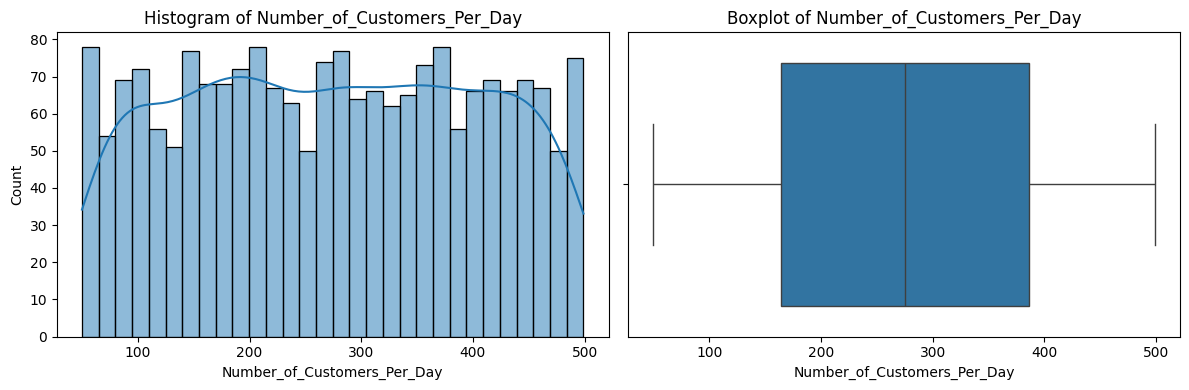

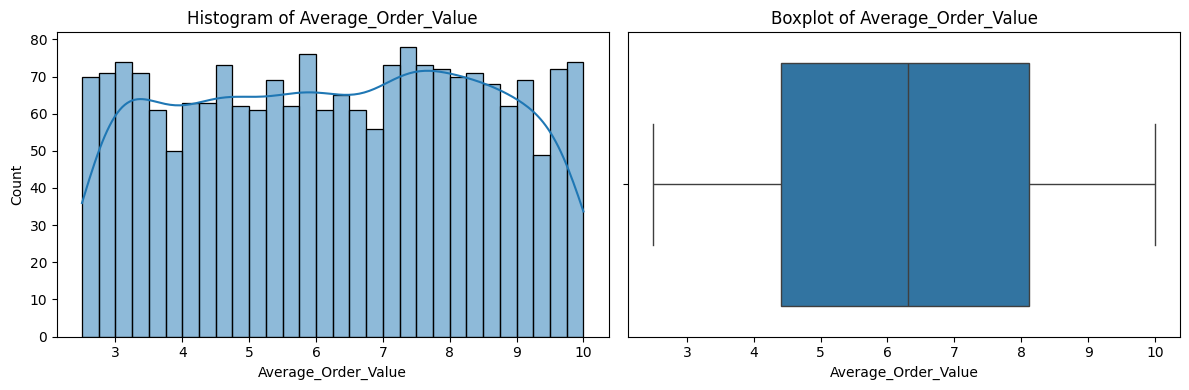

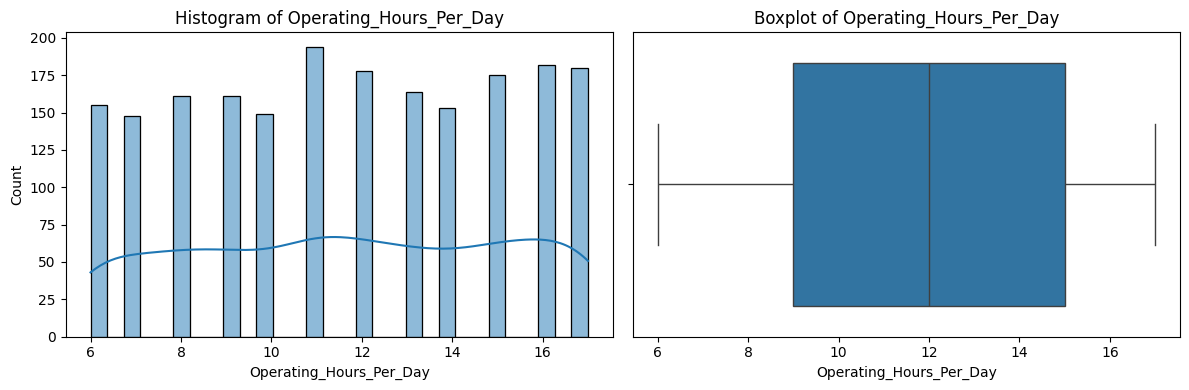

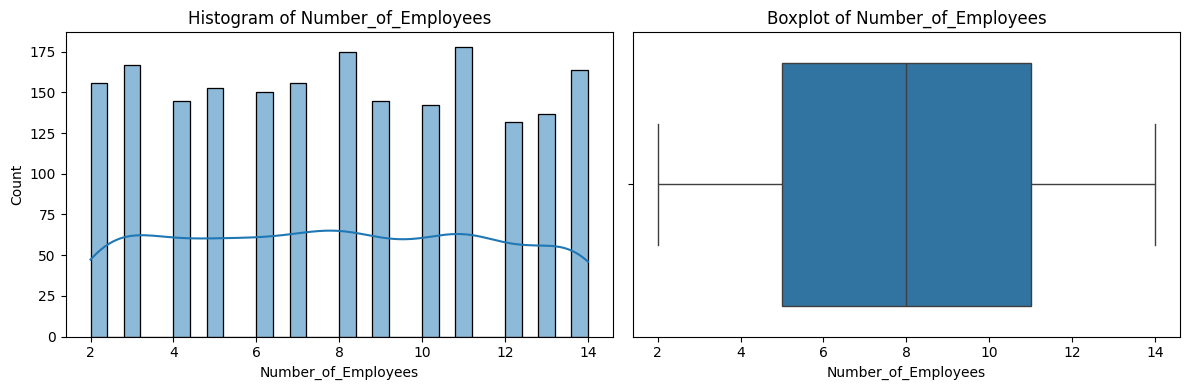

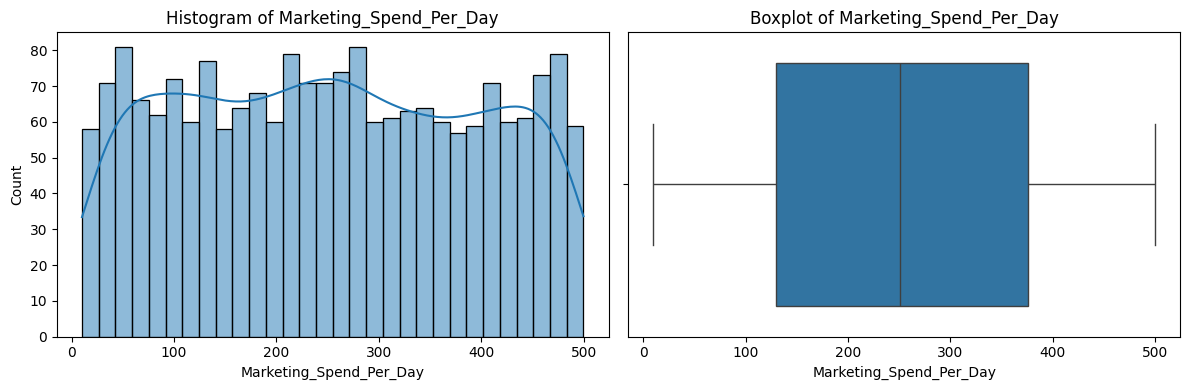

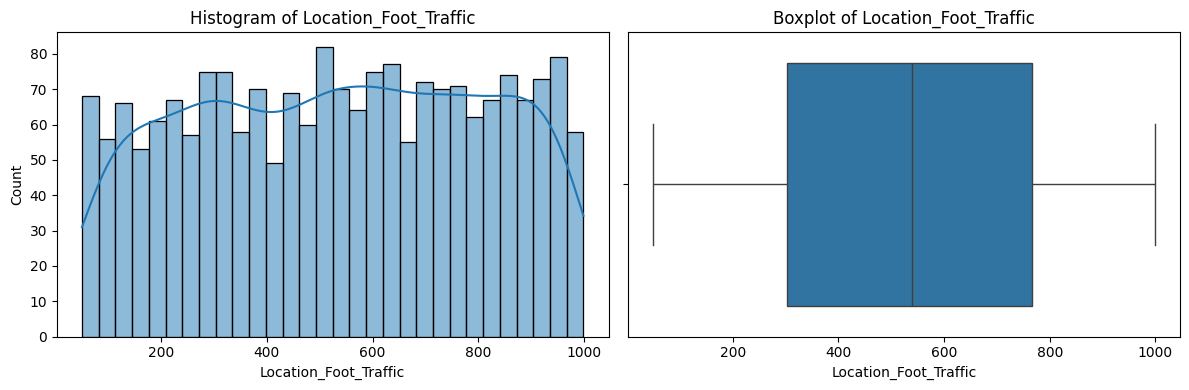

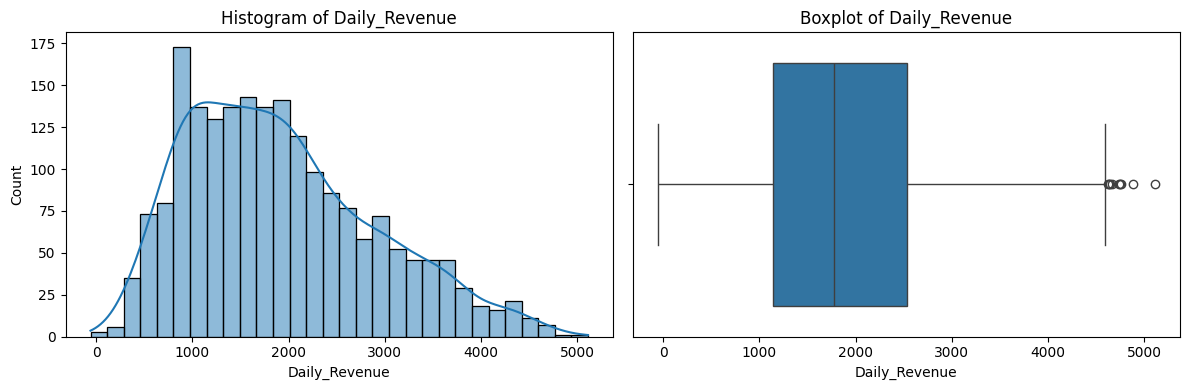

In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print('Numeric columns:', numeric_cols)
print('Categorical columns:', categorical_cols)

for col in numeric_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

for col in categorical_cols:
    print(f'\nColumn: {col}')
    vc = df[col].value_counts(dropna=False)
    print(vc)
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=vc.index)
    plt.title(f'Countplot of {col}')
    plt.tight_layout()
    plt.show()


**Bi variant**

Numeric-Numeric pairs:
Scatter: Number_of_Customers_Per_Day vs Average_Order_Value


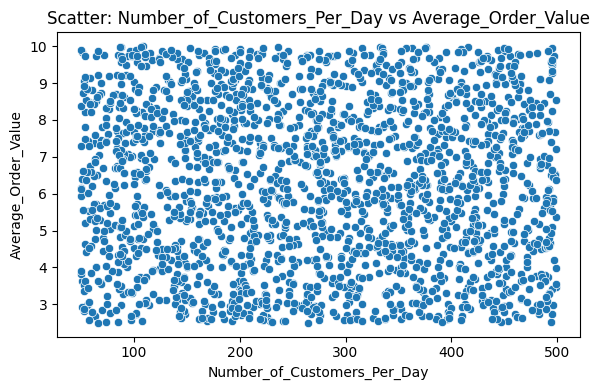

Scatter: Number_of_Customers_Per_Day vs Operating_Hours_Per_Day


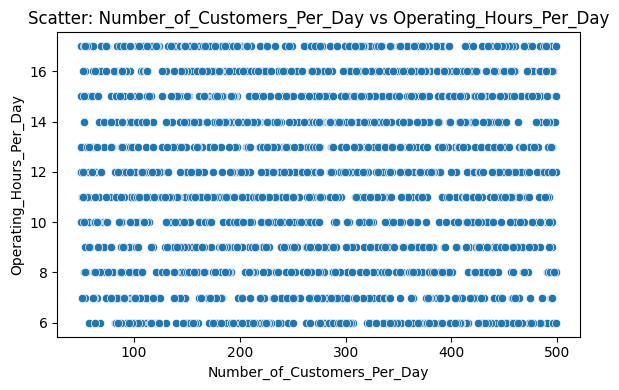

Scatter: Number_of_Customers_Per_Day vs Number_of_Employees


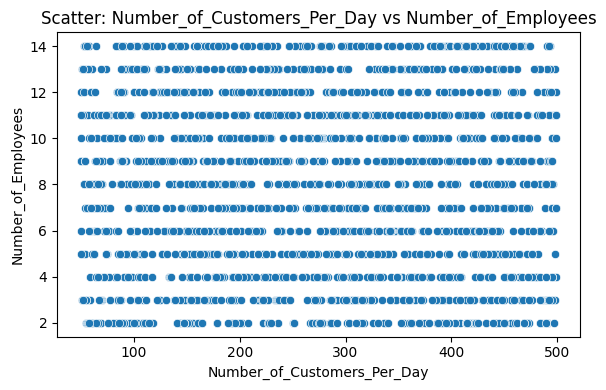

Scatter: Number_of_Customers_Per_Day vs Marketing_Spend_Per_Day


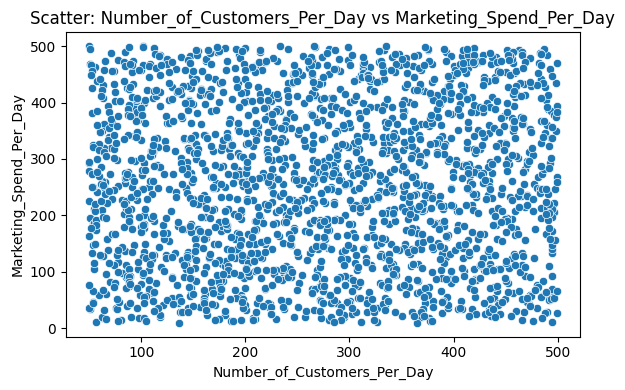

Scatter: Number_of_Customers_Per_Day vs Location_Foot_Traffic


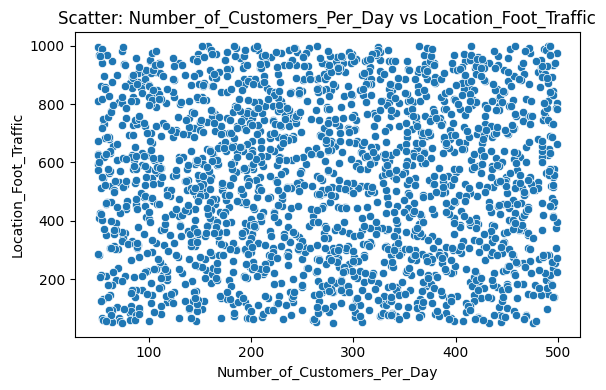

Scatter: Number_of_Customers_Per_Day vs Daily_Revenue


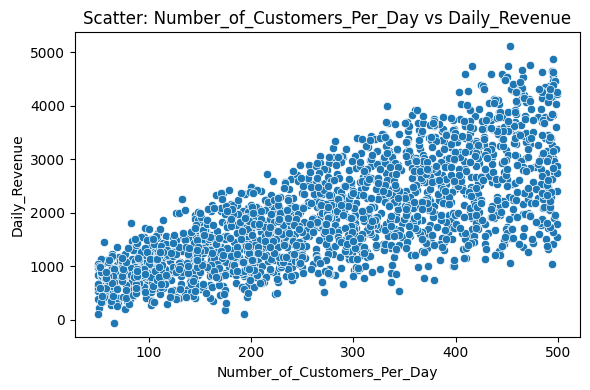

Scatter: Average_Order_Value vs Operating_Hours_Per_Day


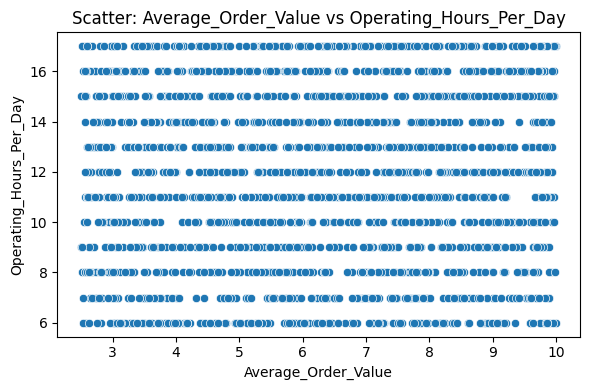

Scatter: Average_Order_Value vs Number_of_Employees


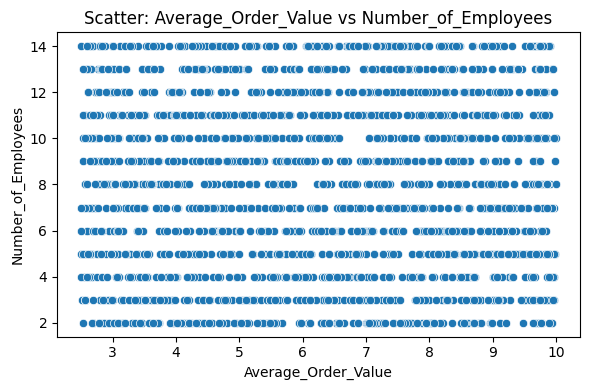

Scatter: Average_Order_Value vs Marketing_Spend_Per_Day


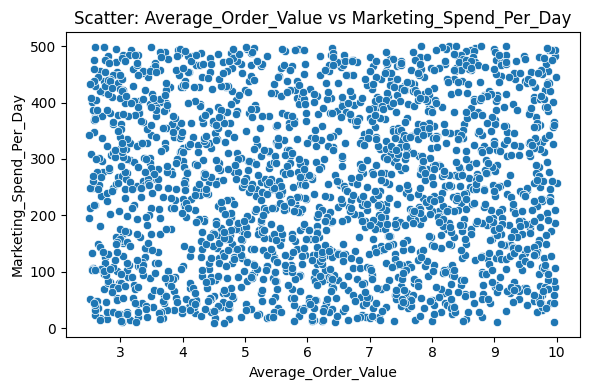

Scatter: Average_Order_Value vs Location_Foot_Traffic


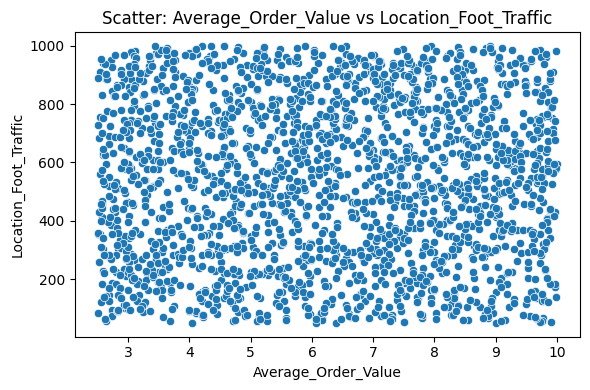

Scatter: Average_Order_Value vs Daily_Revenue


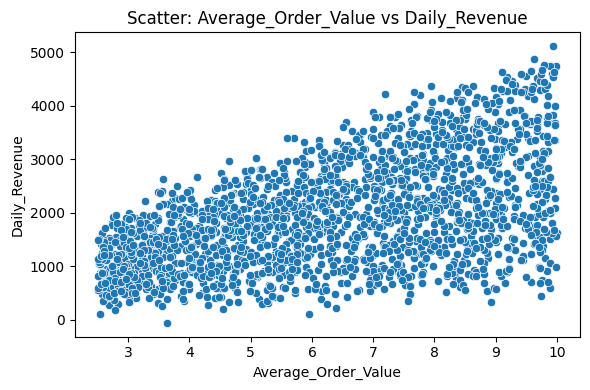

Scatter: Operating_Hours_Per_Day vs Number_of_Employees


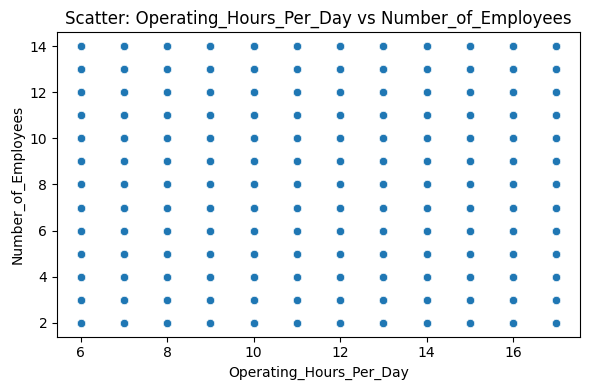

Scatter: Operating_Hours_Per_Day vs Marketing_Spend_Per_Day


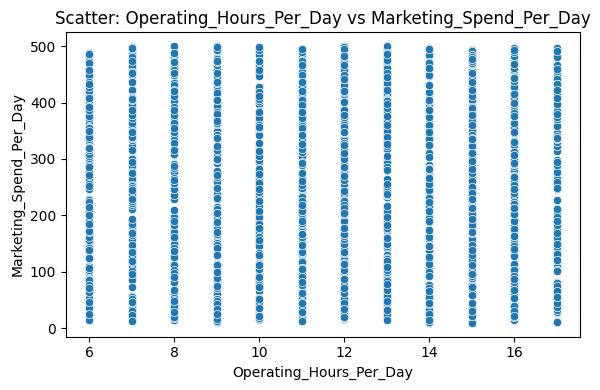

Scatter: Operating_Hours_Per_Day vs Location_Foot_Traffic


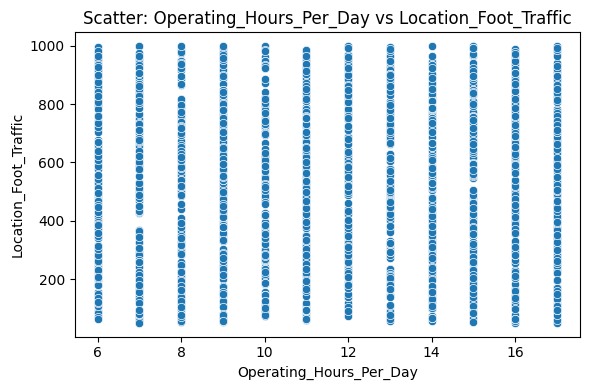

Scatter: Operating_Hours_Per_Day vs Daily_Revenue


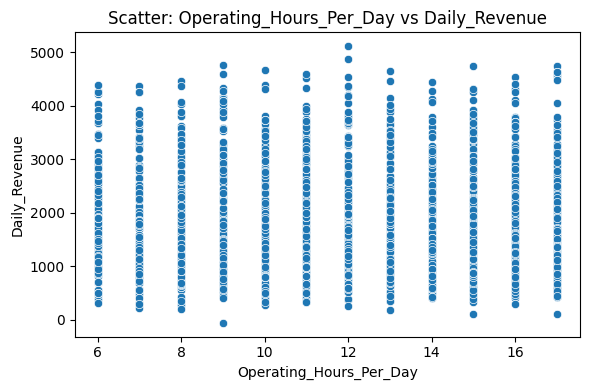

Scatter: Number_of_Employees vs Marketing_Spend_Per_Day


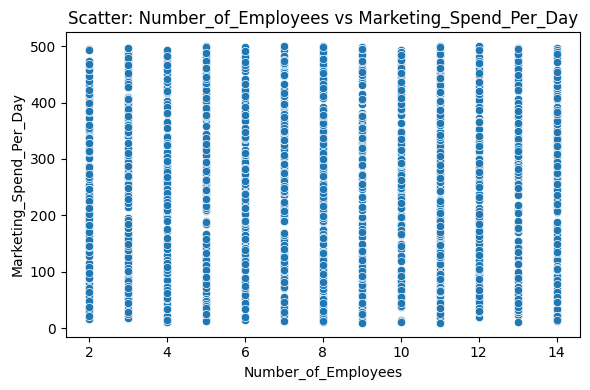

Scatter: Number_of_Employees vs Location_Foot_Traffic


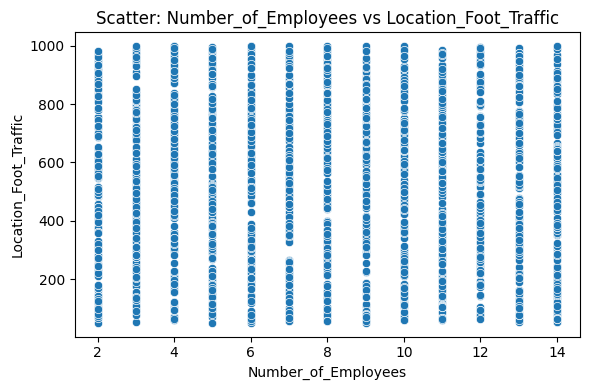

Scatter: Number_of_Employees vs Daily_Revenue


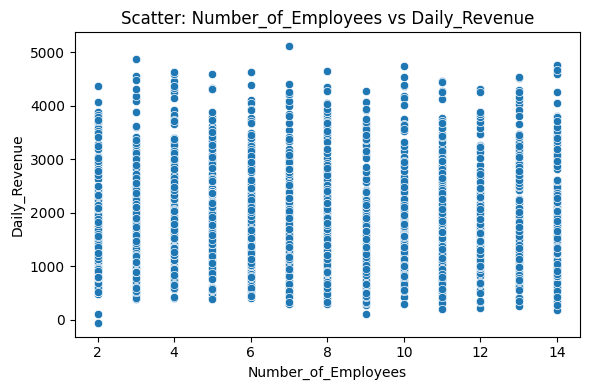

Scatter: Marketing_Spend_Per_Day vs Location_Foot_Traffic


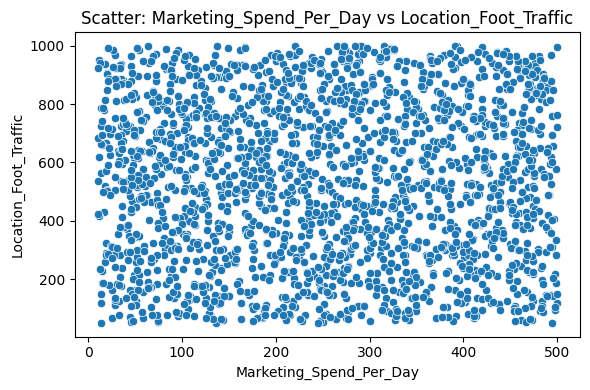

Scatter: Marketing_Spend_Per_Day vs Daily_Revenue


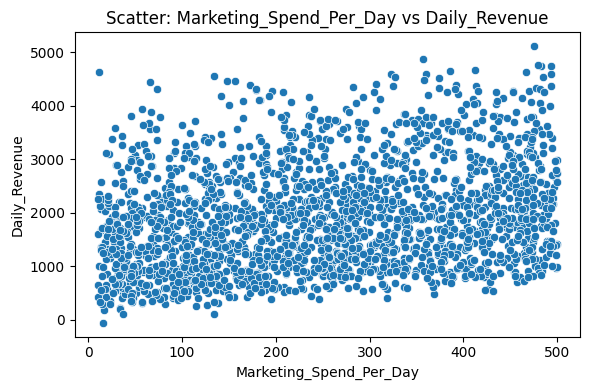

Scatter: Location_Foot_Traffic vs Daily_Revenue


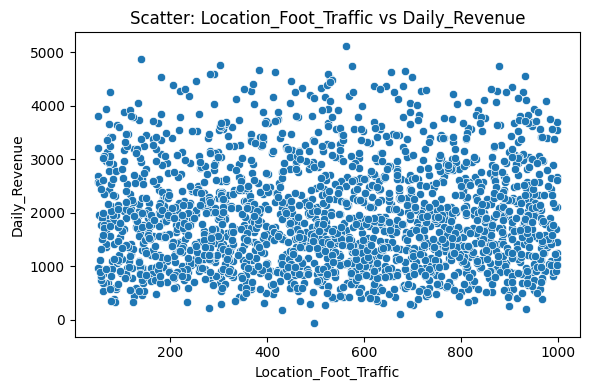

In [12]:
from itertools import combinations

if len(numeric_cols) > 1:
    print('Numeric-Numeric pairs:')
    for col1, col2 in combinations(numeric_cols, 2):
        print(f'Scatter: {col1} vs {col2}')
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col1], y=df[col2])
        plt.title(f'Scatter: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.tight_layout()
        plt.show()


# Categorical-numeric: boxplots and violinplots
for cat in categorical_cols:
    for num in numeric_cols:
        print(f'Boxplot: {num} by {cat}')
        plt.figure(figsize=(8,4))
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f'Boxplot: {num} by {cat}')
        plt.tight_layout()
        plt.show()
        print(f'Violinplot: {num} by {cat}')
        plt.figure(figsize=(8,4))
        sns.violinplot(x=cat, y=num, data=df)
        plt.title(f'Violinplot: {num} by {cat}')
        plt.tight_layout()
        plt.show()




**Tri Variant**


3D scatter: Number_of_Customers_Per_Day vs Average_Order_Value vs Operating_Hours_Per_Day


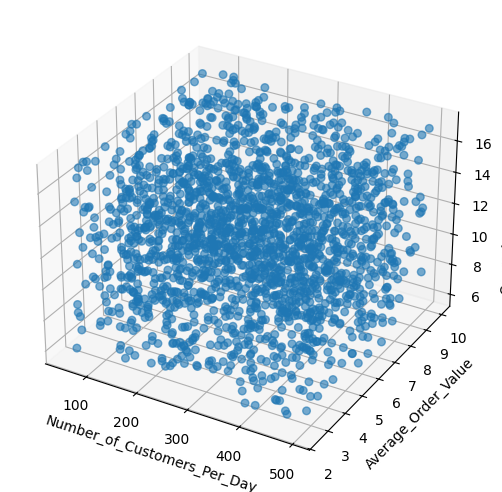

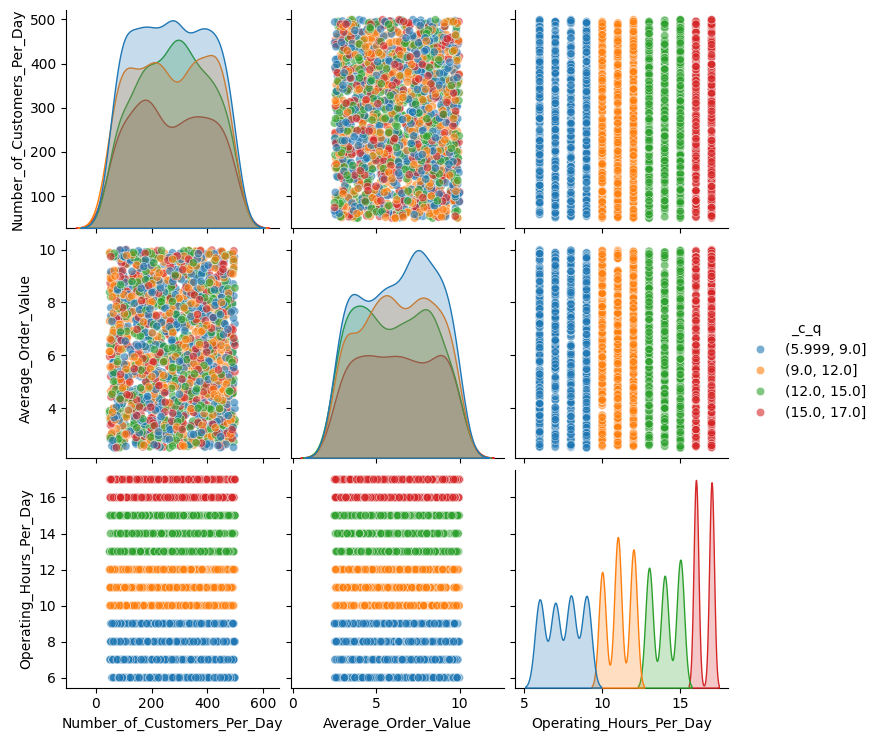


3D scatter: Number_of_Customers_Per_Day vs Average_Order_Value vs Number_of_Employees


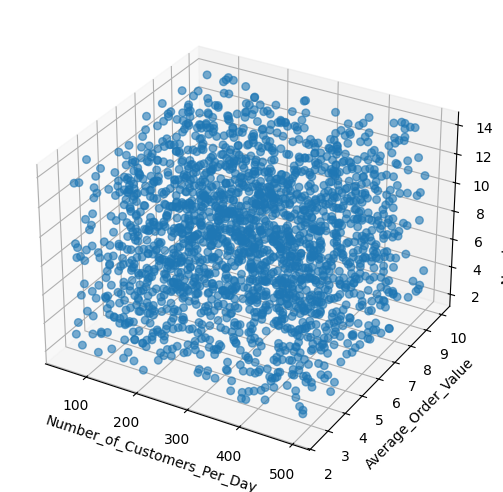

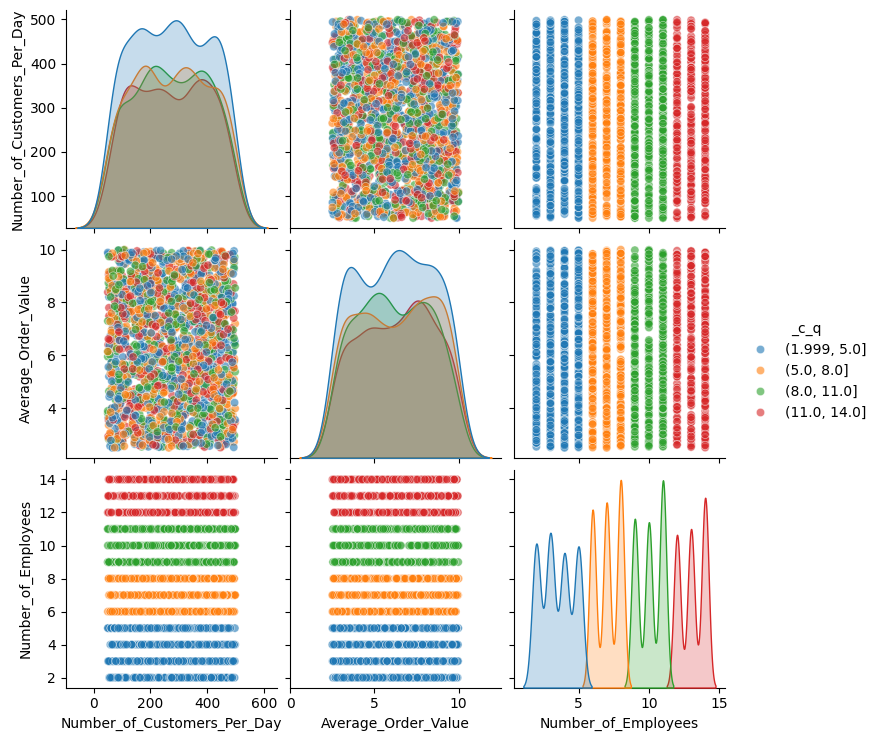


3D scatter: Number_of_Customers_Per_Day vs Average_Order_Value vs Marketing_Spend_Per_Day


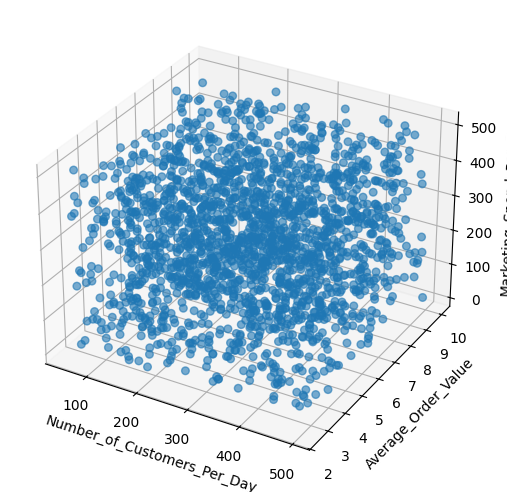

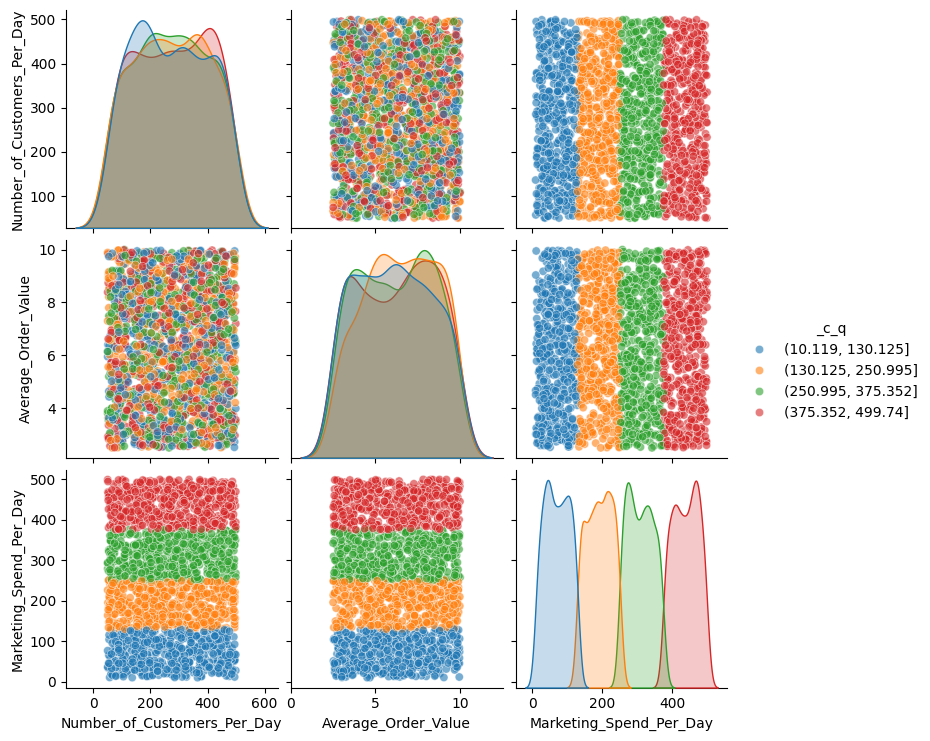


3D scatter: Number_of_Customers_Per_Day vs Average_Order_Value vs Location_Foot_Traffic


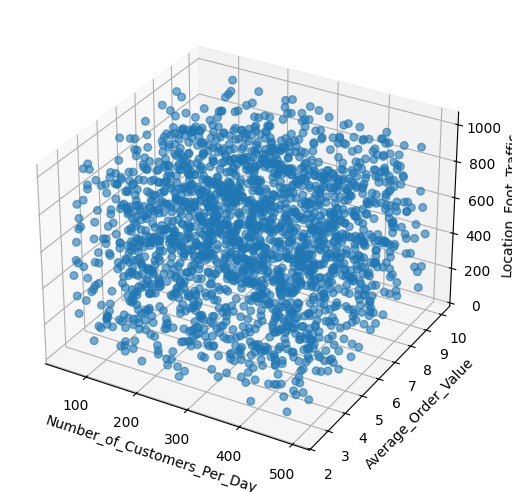

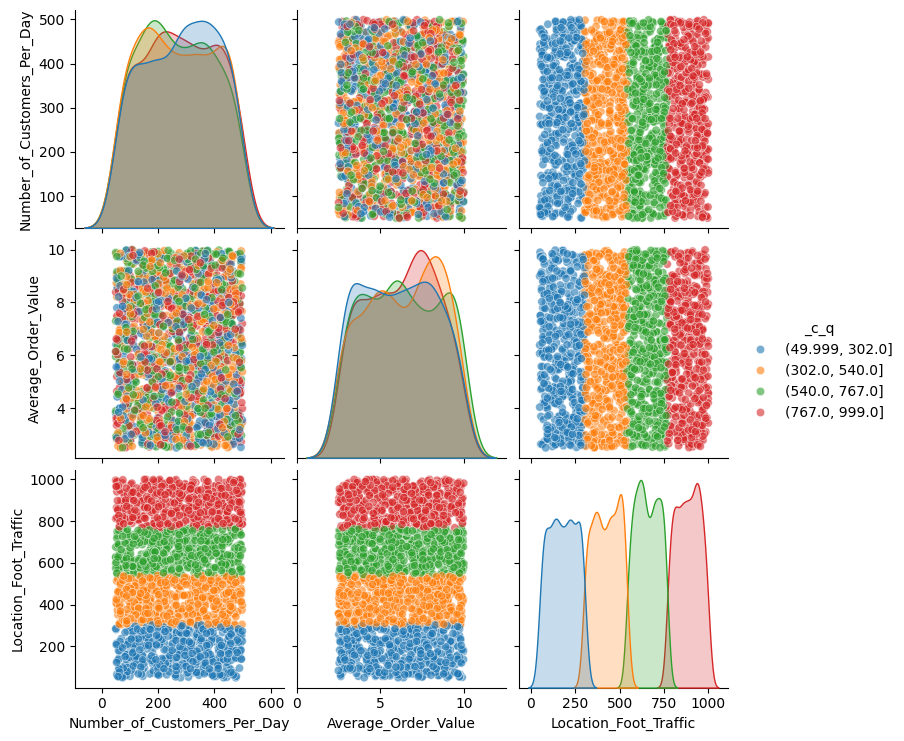

Reached plotting limit for 3-variable combos (4).
TRI Variant analysis completed.


In [13]:
# TRI Variant - Trivariate analysis
# Covers: numeric-numeric-numeric (3D & conditioned pairplots),
#         numeric-numeric-categorical (interaction / lmplot / group means),
#         categorical-categorical-numeric (pivot heatmap & stacked counts)
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ensure numeric_cols / categorical_cols are available if cell is run independently
numeric_cols = numeric_cols if 'numeric_cols' in globals() else df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = categorical_cols if 'categorical_cols' in globals() else df.select_dtypes(include=['object','category','bool']).columns.tolist()

# 1) Three numeric variables: 3D scatter + conditioned pairplot by quantiles of the 3rd var
if len(numeric_cols) >= 3:
    combos = list(combinations(numeric_cols, 3))
    # limit to first 4 combos to avoid excessive plotting on large datasets
    for idx, (a, b, c) in enumerate(combos):
        print(f'\n3D scatter: {a} vs {b} vs {c}')
        subset = df[[a, b, c]].dropna()
        if subset.empty:
            print('No rows with all three values present, skipping')
            continue
        fig = plt.figure(figsize=(7,5))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(subset[a], subset[b], subset[c], alpha=0.6, s=30)
        ax.set_xlabel(a); ax.set_ylabel(b); ax.set_zlabel(c)
        plt.tight_layout(); plt.show()

        # Condition pairplot by quantiles of the third variable to see interactions
        try:
            q = pd.qcut(subset[c], q=4, duplicates='drop')
            subset = subset.copy()
            subset['_c_q'] = q
            sns.pairplot(subset, vars=[a, b, c], hue='_c_q', plot_kws={'alpha':0.6}, diag_kind='kde')
            plt.show()
        except Exception as e:
            print('Pairplot skipped (qcut/pairplot issue):', e)

        if idx >= 3:
            print('Reached plotting limit for 3-variable combos (4).')
            break

# 2) Two numerics + one categorical: group means, interaction lineplots and lmplot by category
if len(numeric_cols) >= 2 and len(categorical_cols) >= 1:
    for cat in categorical_cols:
        for x, y in combinations(numeric_cols, 2):
            print(f'\nInteraction: {x} vs {y} by {cat}')
            # group means - lineplot (helps to see trends across categories)
            grp = df.groupby(cat)[[x, y]].mean().reset_index()
            if not grp.empty:
                grp_melt = grp.melt(id_vars=cat, value_vars=[x, y], var_name='metric', value_name='mean')
                plt.figure(figsize=(8,4))
                sns.lineplot(data=grp_melt, x=cat, y='mean', hue='metric', marker='o')
                plt.xticks(rotation=45)
                plt.title(f'Group means of {x} and {y} by {cat}')
                plt.tight_layout(); plt.show()
            else:
                print('No group means to plot (empty group).')

            # scatter with categorical hue (lmplot for regression by category if reasonable)
            try:
                sns.lmplot(data=df, x=x, y=y, hue=cat, height=5, aspect=1.2, scatter_kws={'alpha':0.6})
                plt.title(f'{y} vs {x} colored by {cat}')
                plt.tight_layout(); plt.show()
            except Exception as e:
                print('lmplot skipped:', e)

# 3) Two categoricals + one numeric: pivot heatmap of mean numeric, and stacked counts
if len(categorical_cols) >= 2 and len(numeric_cols) >= 1:
    num = numeric_cols[0]
    for c1, c2 in combinations(categorical_cols, 2):
        print(f'\nHeatmap of mean {num} for {c1} vs {c2}')
        pivot = df.pivot_table(index=c1, columns=c2, values=num, aggfunc='mean')
        if pivot is None or pivot.empty:
            print('Pivot is empty, skipping heatmap for', c1, c2)
            continue
        plt.figure(figsize=(8,5))
        sns.heatmap(pivot, annot=True, fmt='.2f', cmap='viridis', cbar_kws={'label':f'Mean {num}'})
        plt.title(f'Mean {num} by {c1} and {c2}')
        plt.tight_layout(); plt.show()

        # stacked counts to inspect joint distribution of the categories
        ct = pd.crosstab(df[c1], df[c2])
        if not ct.empty:
            ct.plot(kind='bar', stacked=True, figsize=(8,4))
            plt.title(f'Counts of {c1} by {c2}')
            plt.tight_layout(); plt.show()
        else:
            print('Cross-tab empty, skipping stacked bar for', c1, c2)

print('TRI Variant analysis completed.')

**Correlation Heatmap**

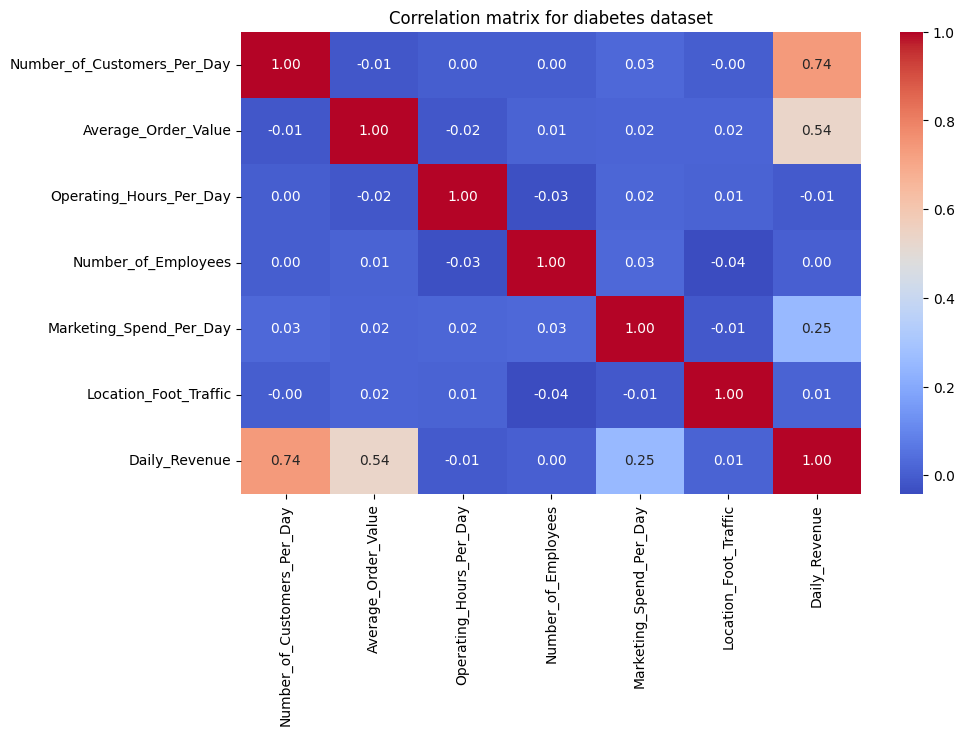

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation matrix for diabetes dataset')
plt.show()

**Class Imbalance**

Daily_Revenue
1237.50    2
1535.35    2
2828.52    1
2326.78    1
1502.35    1
          ..
2369.75    1
2653.79    1
3466.31    1
1542.90    1
1304.23    1
Name: count, Length: 1998, dtype: int64
Daily_Revenue
1237.50    0.0010
1535.35    0.0010
2828.52    0.0005
2326.78    0.0005
1502.35    0.0005
            ...  
2369.75    0.0005
2653.79    0.0005
3466.31    0.0005
1542.90    0.0005
1304.23    0.0005
Name: proportion, Length: 1998, dtype: float64


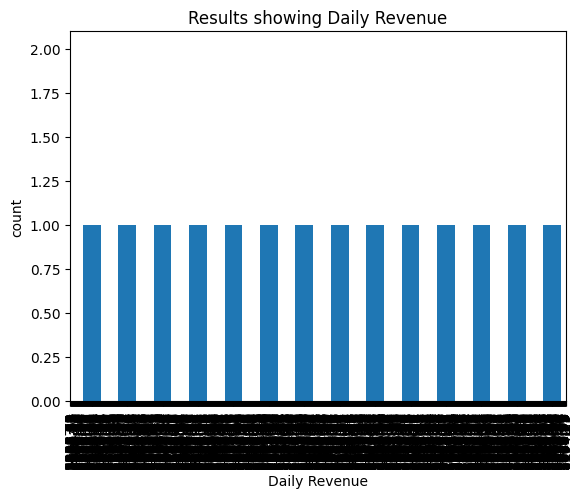

In [15]:
print(df['Daily_Revenue'].value_counts())
print(df['Daily_Revenue'].value_counts(normalize=True))

import matplotlib.pyplot as plt
df['Daily_Revenue'].value_counts().plot(kind='bar')
plt.title('Results showing Daily Revenue')
plt.xlabel('Daily Revenue')
plt.ylabel('count')
plt.show()

**Over Sampling**

In [16]:
# Check class distribution first
print(df['Daily_Revenue'].value_counts())

# Only run oversampling if both classes exist and majority > minority
if df['Daily_Revenue'].nunique() == 2:
    majority_class = df['Daily_Revenue'].value_counts().idxmax()
    minority_class = df['Daily_Revenue'].value_counts().idxmin()
    df_majority = df[df['Daily_Revenue'] == majority_class]
    df_minority = df[df['Daily_Revenue'] == minority_class]
    print(f"Majority class: {majority_class}, Minority class: {minority_class}")
    print(f"Majority count: {len(df_majority)}, Minority count: {len(df_minority)}")
    if len(df_majority) > 0 and len(df_minority) > 0:
        df_minority_oversampled = resample(
            df_minority,
            replace=True,
            n_samples=len(df_majority),
            random_state=42
        )
        df_oversampled = pd.concat([df_majority, df_minority_oversampled])
        print(df_oversampled['Daily_Revenue'].value_counts(normalize=True))
    else:
        print("Cannot oversample: one of the classes has zero samples.")
else:
    print("Oversampling requires exactly two classes in the target variable.")

Daily_Revenue
1237.50    2
1535.35    2
2828.52    1
2326.78    1
1502.35    1
          ..
2369.75    1
2653.79    1
3466.31    1
1542.90    1
1304.23    1
Name: count, Length: 1998, dtype: int64
Oversampling requires exactly two classes in the target variable.


Daily_Revenue
1237.50    2
1535.35    2
2828.52    1
2326.78    1
1502.35    1
          ..
2369.75    1
2653.79    1
3466.31    1
1542.90    1
1304.23    1
Name: count, Length: 1998, dtype: int64
Daily_Revenue
1237.50    0.0010
1535.35    0.0010
2828.52    0.0005
2326.78    0.0005
1502.35    0.0005
            ...  
2369.75    0.0005
2653.79    0.0005
3466.31    0.0005
1542.90    0.0005
1304.23    0.0005
Name: proportion, Length: 1998, dtype: float64


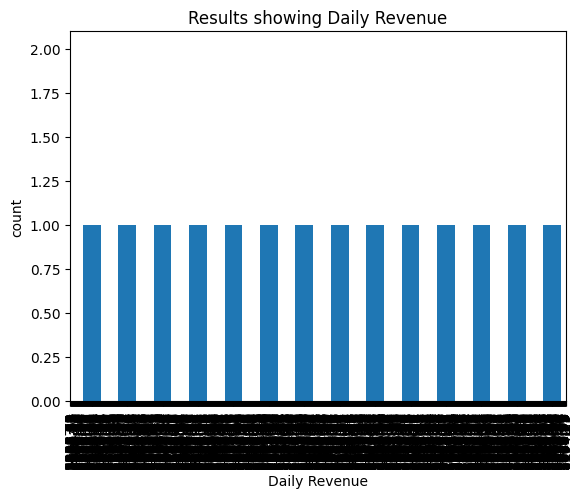

In [17]:
print(df['Daily_Revenue'].value_counts())
print(df['Daily_Revenue'].value_counts(normalize=True))

import matplotlib.pyplot as plt
df['Daily_Revenue'].value_counts().plot(kind='bar')
plt.title('Results showing Daily Revenue')
plt.xlabel('Daily Revenue')
plt.ylabel('count')
plt.show()

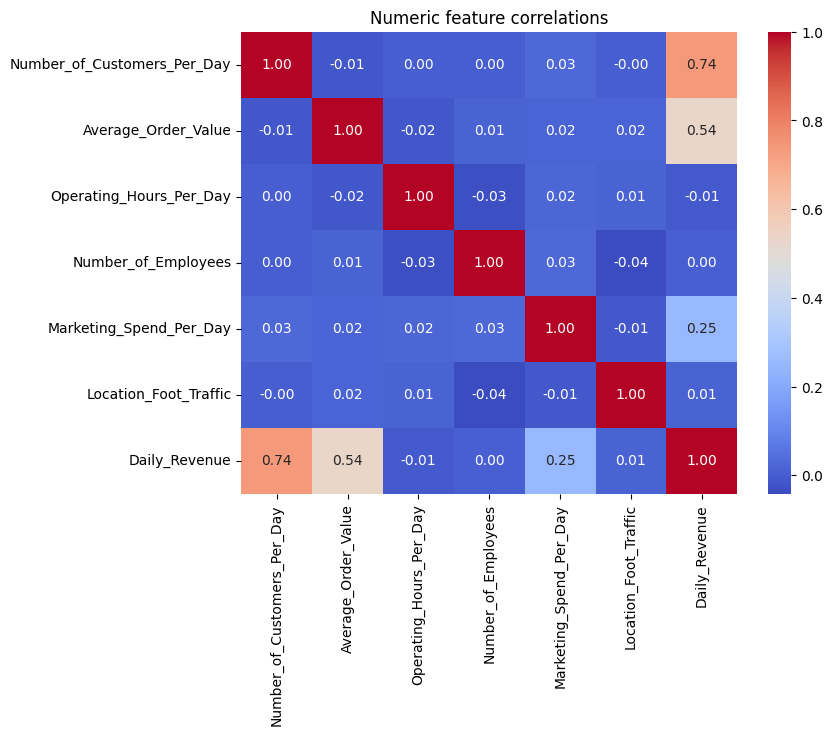

In [18]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Numeric feature correlations')
plt.show()


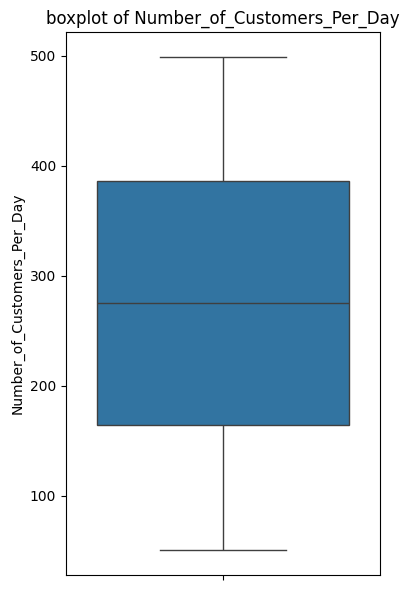

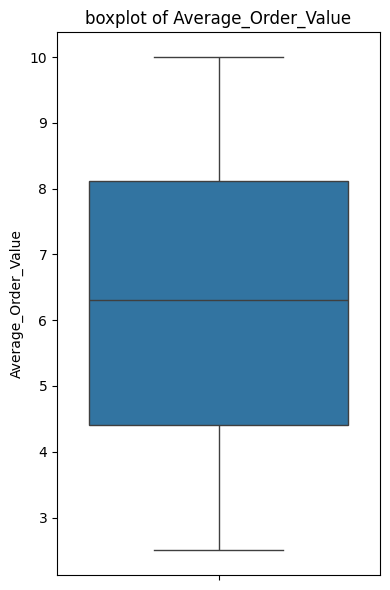

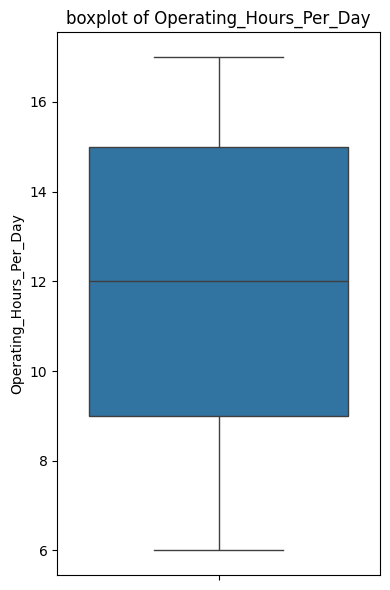

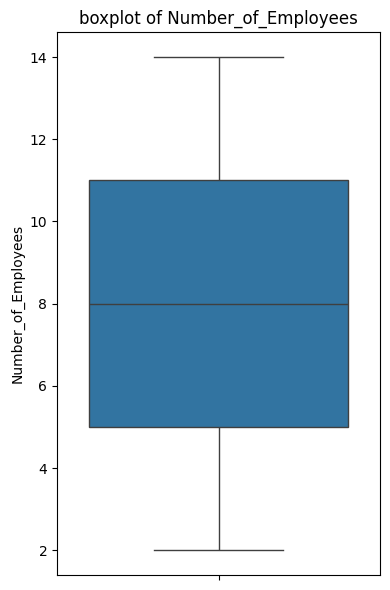

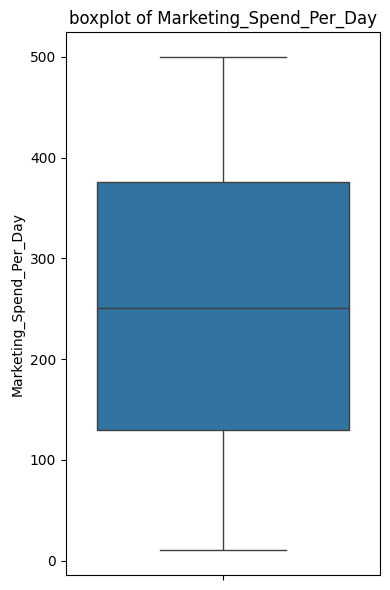

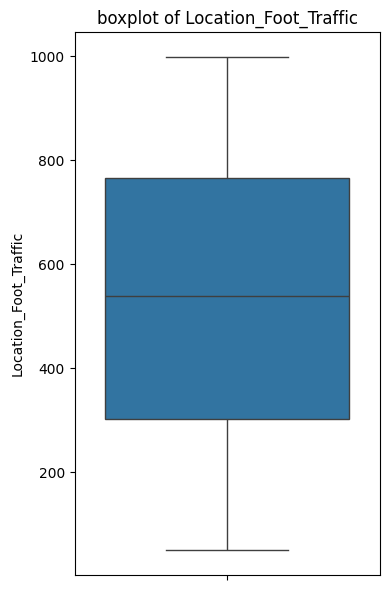

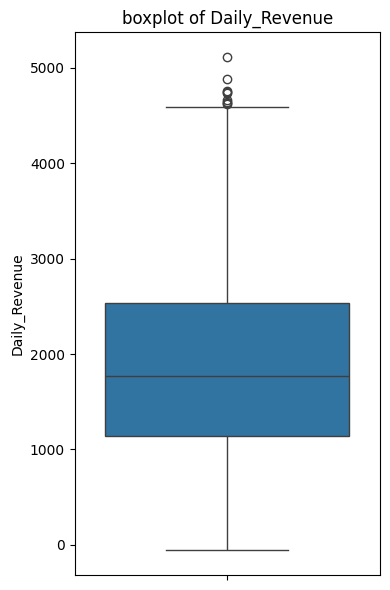

In [19]:
numeric_cols=df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(4,6))
    sns.boxplot(y=df[col])
    plt.title(f'boxplot of {col}',fontsize=12)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


**Outlier**

In [20]:
Q1=df['Daily_Revenue'].quantile(0.25)
Q3=df['Daily_Revenue'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [21]:
df=df[(df['Daily_Revenue']>=lower_bound)&(df['Daily_Revenue']<=upper_bound)]

In [22]:
Q1=df['Daily_Revenue'].quantile(0.25)
Q3=df['Daily_Revenue'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df=df[(df['Daily_Revenue']>=lower_bound)&(df['Daily_Revenue']<=upper_bound)]

In [23]:
Q1=df['Daily_Revenue'].quantile(0.25)
Q3=df['Daily_Revenue'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df=df[(df['Daily_Revenue']>=lower_bound)&(df['Daily_Revenue']<=upper_bound)]

In [24]:
Q1=df['Daily_Revenue'].quantile(0.25)
Q3=df['Daily_Revenue'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df=df[(df['Daily_Revenue']>=lower_bound)&(df['Daily_Revenue']<=upper_bound)]

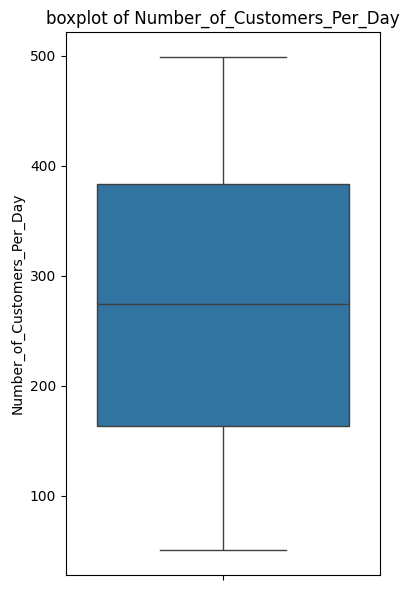

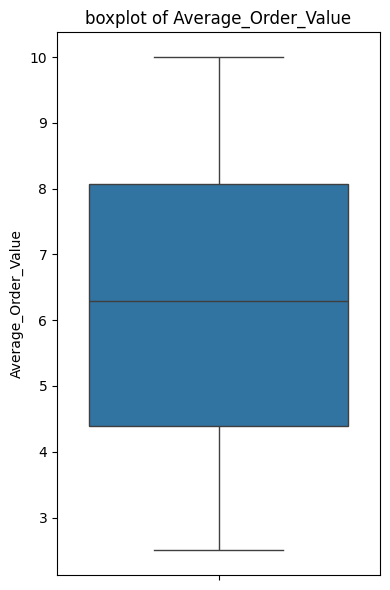

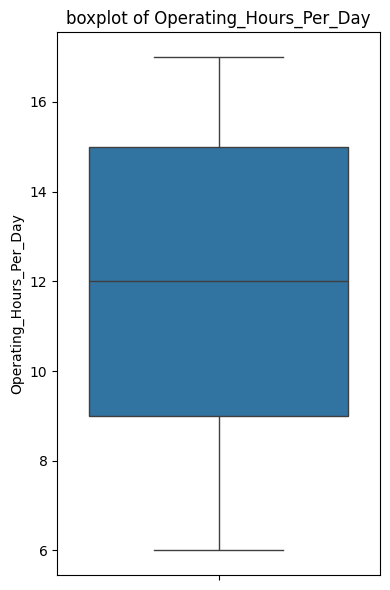

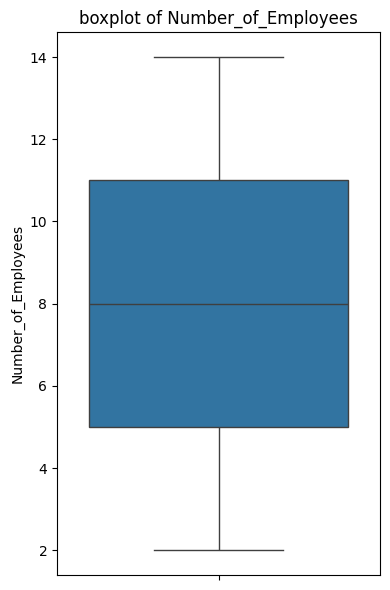

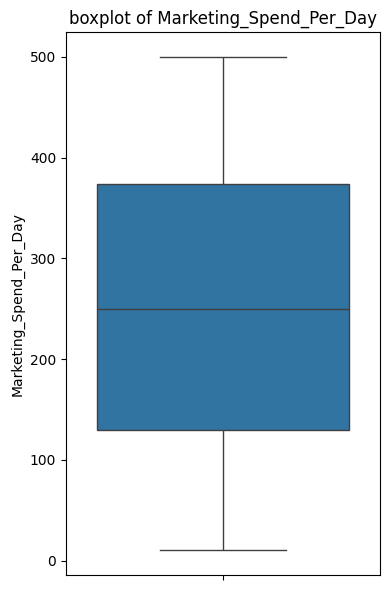

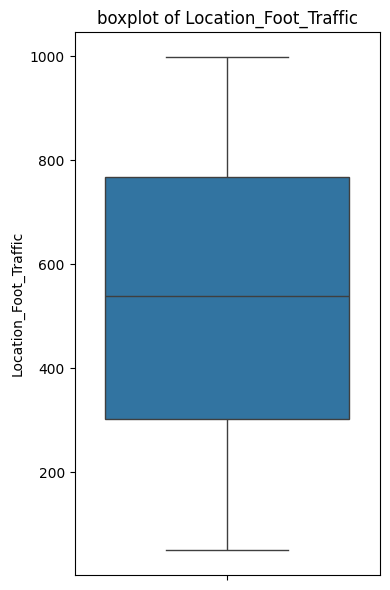

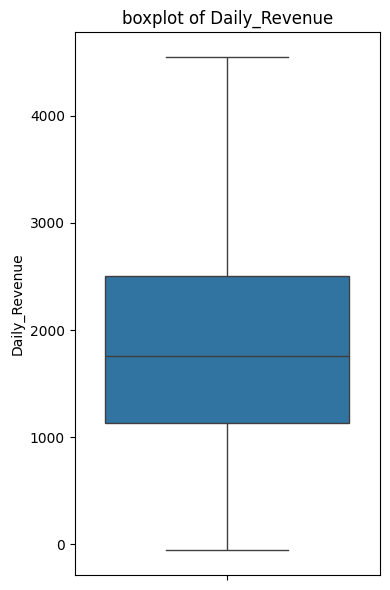

In [25]:
numeric_cols=df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(4,6))
    sns.boxplot(y=df[col])
    plt.title(f'boxplot of {col}',fontsize=12)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [26]:
df.head()

Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                          152                 6.74                       14   
1                          485                 4.50                       12   
2                          398                 9.09                        6   
3                          320                 8.48                       17   
4                          156                 7.44                       17   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0                    4                   106.62                     97   
1                    8                    57.83                    744   
2                    6                    91.76                    636   
3                    4                   462.63                    770   
4                    2                   412.52                    232   

   Daily_Revenue  
0        1547.81  
1        2084.68  
2        3118.39  
3        2912.20  
4        1663.42

**Split into X and Y**

In [27]:
X=df[['Number_of_Customers_Per_Day','Average_Order_Value','Operating_Hours_Per_Day','Number_of_Employees','Marketing_Spend_Per_Day','Location_Foot_Traffic']]
Y=df[['Daily_Revenue']]

**Standardization**

In [28]:
from scipy.stats import skew,kurtosis

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(X)

In [30]:
x.shape

(1988, 6)

In [31]:
Y.shape

(1988, 1)

**Train Test**

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [33]:
X_train.shape

(1590, 6)

In [34]:
Y_train.shape

(1590, 1)

In [35]:
X_test.shape

(398, 6)

In [36]:
Y_test.shape

(398, 1)

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
print('Libraries imported successfully!')

Libraries imported successfully!


In [38]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('Features scaled successfully')

Features scaled successfully


In [39]:
results = {}

**Linear Regression**

In [40]:
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)
Y_pred = lr.predict(X_test_scaled)
results['Linear Regression'] = {
    'MAE': mean_absolute_error(Y_test, Y_pred),
    'RMSE': np.sqrt(mean_squared_error(Y_test, Y_pred)),
    'R2': r2_score(Y_test, Y_pred)
}
print('Linear Regression:')
print(f"MAE: {results['Linear Regression']['MAE']:.2f}")
print(f"RMSE: {results['Linear Regression']['RMSE']:.2f}")
print(f"R2 Score: {results['Linear Regression']['R2']:.4f}")

Linear Regression:
MAE: 253.09
RMSE: 312.24
R2 Score: 0.8922


**Ridge Regresssion**

In [41]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, Y_train)
Y_pred = ridge.predict(X_test_scaled)
results['Ridge'] = {
    'MAE': mean_absolute_error(Y_test, Y_pred),
    'RMSE': np.sqrt(mean_squared_error(Y_test, Y_pred)),
    'R2': r2_score(Y_test, Y_pred)
}
print('Ridge Regression:')
print(f"MAE: {results['Ridge']['MAE']:.2f}")
print(f"RMSE: {results['Ridge']['RMSE']:.2f}")
print(f"R2 Score: {results['Ridge']['R2']:.4f}")

Ridge Regression:
MAE: 253.47
RMSE: 312.58
R2 Score: 0.8919


**Decision Tree**

In [42]:
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train_scaled, Y_train)
Y_pred = dt.predict(X_test_scaled)
results['Decision Tree'] = {
    'MAE': mean_absolute_error(Y_test, Y_pred),
    'RMSE': np.sqrt(mean_squared_error(Y_test, Y_pred)),
    'R2': r2_score(Y_test, Y_pred)
}
print('Decision Tree:')
print(f"MAE: {results['Decision Tree']['MAE']:.2f}")
print(f"RMSE: {results['Decision Tree']['RMSE']:.2f}")
print(f"R2 Score: {results['Decision Tree']['R2']:.4f}")

Decision Tree:
MAE: 256.29
RMSE: 316.74
R2 Score: 0.8891


**Random Forest Regression**

In [43]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_scaled, Y_train)
Y_pred = rf.predict(X_test_scaled)
results['Random Forest'] = {
    'MAE': mean_absolute_error(Y_test, Y_pred),
    'RMSE': np.sqrt(mean_squared_error(Y_test, Y_pred)),
    'R2': r2_score(Y_test, Y_pred)
}
print('Random Forest:')
print(f"MAE: {results['Random Forest']['MAE']:.2f}")
print(f"RMSE: {results['Random Forest']['RMSE']:.2f}")
print(f"R2 Score: {results['Random Forest']['R2']:.4f}")

Random Forest:
MAE: 188.49
RMSE: 232.74
R2 Score: 0.9401


**Gradient Boosting**

In [44]:
gb = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
gb.fit(X_train_scaled, Y_train)
Y_pred = gb.predict(X_test_scaled)
results['Gradient Boosting'] = {
    'MAE': mean_absolute_error(Y_test, Y_pred),
    'RMSE': np.sqrt(mean_squared_error(Y_test, Y_pred)),
    'R2': r2_score(Y_test, Y_pred)
}
print('Gradient Boosting:')
print(f"MAE: {results['Gradient Boosting']['MAE']:.2f}")
print(f"RMSE: {results['Gradient Boosting']['RMSE']:.2f}")
print(f"R2 Score: {results['Gradient Boosting']['R2']:.4f}")

Gradient Boosting:
MAE: 187.44
RMSE: 231.69
R2 Score: 0.9406


In [45]:
results_df = pd.DataFrame(results).T
print('\nModel Comparison:')
print(results_df.round(4))


Model Comparison:
                        MAE      RMSE      R2
Linear Regression  253.0943  312.2442  0.8922
Ridge              253.4731  312.5780  0.8919
Decision Tree      256.2872  316.7408  0.8891
Random Forest      188.4875  232.7378  0.9401
Gradient Boosting  187.4364  231.6909  0.9406


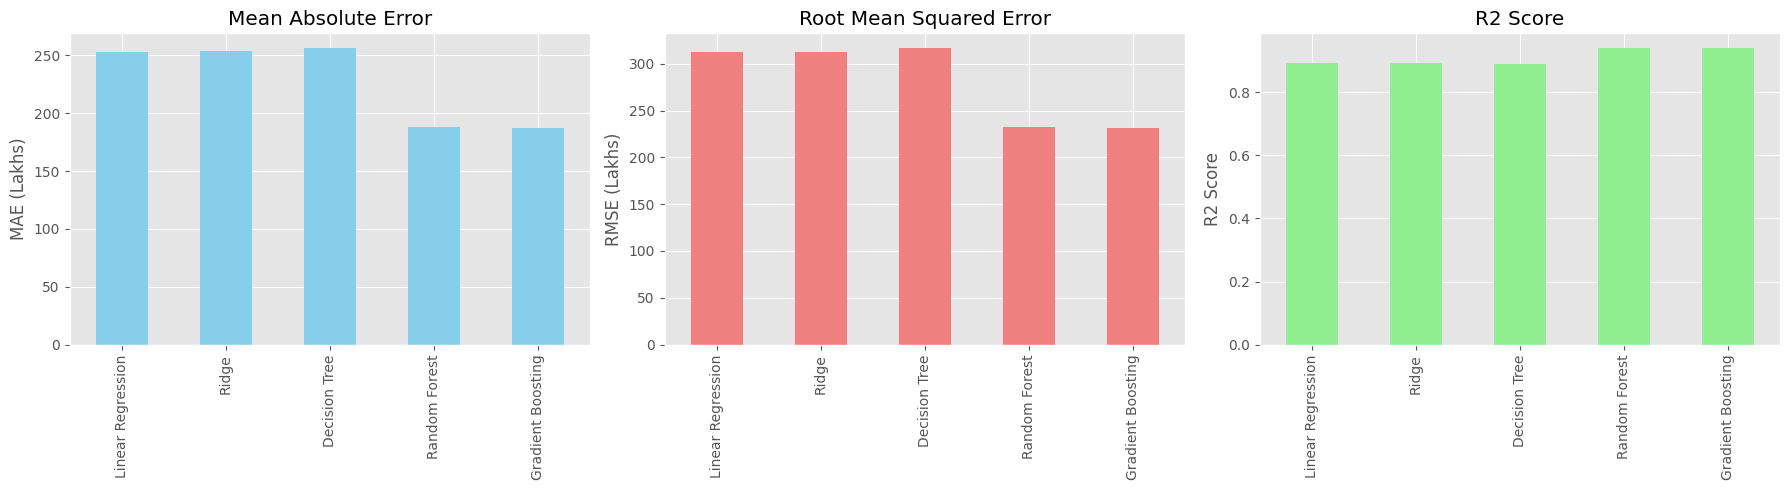

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
results_df['MAE'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Mean Absolute Error')
axes[0].set_ylabel('MAE (Lakhs)')
results_df['RMSE'].plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Root Mean Squared Error')
axes[1].set_ylabel('RMSE (Lakhs)')
results_df['R2'].plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('R2 Score')
axes[2].set_ylabel('R2 Score')
plt.tight_layout()
plt.show()

In [47]:
best_model = results_df['R2'].idxmax()
print(f'\nBest Model: {best_model}')
print(f"R2 Score: {results_df.loc[best_model, 'R2']:.4f}")
print(f"MAE: {results_df.loc[best_model, 'MAE']:.2f} Lakhs")
print(f"RMSE: {results_df.loc[best_model, 'RMSE']:.2f} Lakhs")


Best Model: Gradient Boosting
R2 Score: 0.9406
MAE: 187.44 Lakhs
RMSE: 231.69 Lakhs


In [48]:
import joblib as jb
jb.dump(rf,'coffee.pkl')

['coffee.pkl']